In [1]:
import pickle

In [2]:
from scipy.stats import entropy
def oent(outputs):
    out_entropy4 = []
    for o in outputs:
        A = o
        #for i in range(A.shape[0]):
        a = np.squeeze(A)
        n, c = np.histogram(a,16)
        p = n/sum(n)
        e = entropy(p)
        out_entropy4.append(e)
    return np.asarray(out_entropy4)

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torchvision.datasets as datasets # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms # Transformations we can perform on our dataset
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader, Dataset # Gives easier dataset managment and creates mini batches
from torchvision.datasets import ImageFolder
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
from PIL import Image

In [6]:
device = torch.device("cuda")

In [7]:
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [8]:
testset = torchvision.datasets.Flowers102(
    root='./data', download=True, transform=transform_test,split='test')

In [9]:
from torch.utils.data import DataLoader, Dataset
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

In [10]:
files = glob.glob('data/flowers-102/jpg/*.jpg')
files = testset._image_files

In [11]:
szf = []
for f in files:
    szf.append(os.path.getsize(f)/plt.imread(f).size)

(array([1.020e+02, 1.452e+03, 2.205e+03, 1.455e+03, 6.470e+02, 2.190e+02,
        5.600e+01, 1.100e+01, 1.000e+00, 1.000e+00]),
 array([0.01097845, 0.02217498, 0.03337152, 0.04456805, 0.05576458,
        0.06696112, 0.07815765, 0.08935419, 0.10055072, 0.11174725,
        0.12294379]),
 <BarContainer object of 10 artists>)

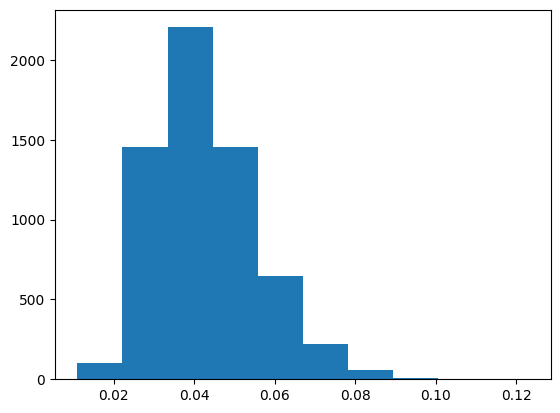

In [12]:
plt.hist(szf)

In [13]:
szf = np.asarray(szf)

In [14]:
np.where(szf<0.02)

(array([  36,   54,  247,  741,  751,  755,  767,  773, 2098, 2776, 2777,
        2790, 2804, 3177, 3182, 3237, 3248, 3250, 3708, 3808, 3857, 3872,
        4067, 4341, 4343, 4422, 5135, 5159, 5172, 5173, 5216, 5944]),)

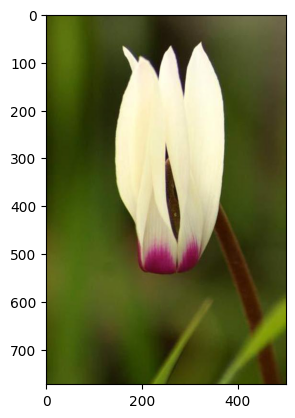

In [15]:
plt.imshow(plt.imread(np.random.choice(np.asarray(files)[np.where(szf<0.02)[0]])))

27


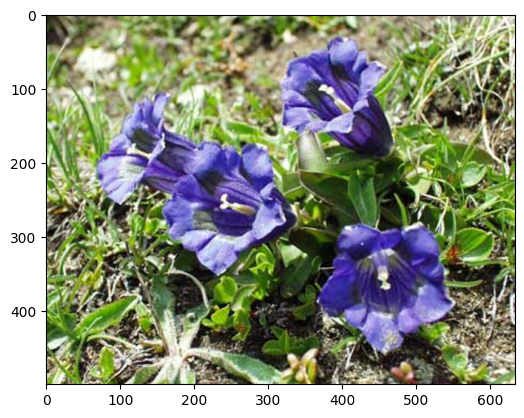

In [16]:
a = np.random.choice(np.where(szf>0.08)[0])
print(testset._labels[a])
plt.imshow(plt.imread(files[a]))

In [17]:
labels = np.asarray(testset._labels)

In [18]:
m = []
for i in range(102):
    m.append(np.mean(szf[labels==i]))

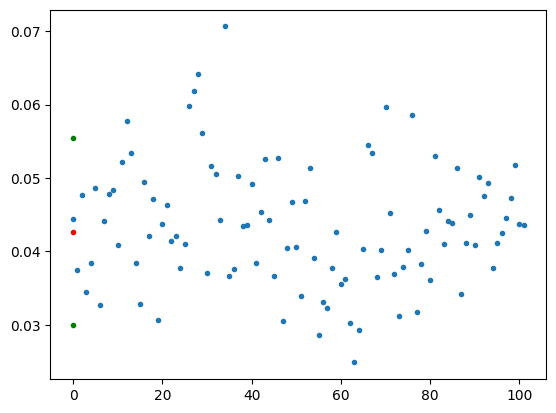

In [19]:
plt.plot(m,'.')
plt.plot(np.mean(szf),'r.')
plt.plot(np.mean(szf)+np.std(szf),'g.')
plt.plot(np.mean(szf)-np.std(szf),'g.')

np.array(PIL.Image.open(files[16])).size

import scipy.io

A = scipy.io.loadmat('data/flowers-102/setid.mat')

In [20]:
testset.__len__()

6149

In [21]:
from tqdm import tqdm
from torchvision import models
# load pretrain model and modify...
model = models.resnet18(pretrained=False)
#model = Simple(2)
# If you want to do finetuning then set requires_grad = False
# Remove these two lines if you want to train entire model,
# and only want to load the pretrain weights.

# for param in model.parameters():
#     param.requires_grad = False

num_ftrs = model.fc.in_features
#model.fc = nn.Linear(num_ftrs, 2)
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 102)
)
device = torch.device("cuda")
model = torch.nn.DataParallel(model)
#    cudnn.benchmark = True
model.to(device)


/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [22]:
criterion = nn.CrossEntropyLoss()

def test():
    model.eval()
    test_loss = 0
    correct = 0
    out = []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predictions = torch.max(output, 1)
            correct += (predictions == y).sum().item()
            test_loss = criterion(output, y)
            out.extend(predictions.cpu().numpy())
            
    test_loss /= len(test_loader.dataset)
    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")
    return out, correct / len(test_loader.dataset)

In [ ]:
files = glob.glob('flowers/DefTest_6149_0.043_0.013/checkpoint/*_*.pth')
ind = {}
for f in files:
    name = f.split('/')[-1].split('_')[1].split('.')[0]
    checkpoint = torch.load(f)
    model.load_state_dict(checkpoint['net'])
    #print(name)
    pred,o = test()
    ind[name] = np.where(pred==labels)[0]

In [26]:
files = glob.glob('flowers/DefTest_6149_0.043_0.013/checkpoint/*_*.pth')
out_ent = {}
out_med = {}
out_cov = {}
acc = {}
ind = {}
for f in files:
    name = f.split('/')[-1].split('_')[1].split('.')[0]
    checkpoint = torch.load(f)
    model.load_state_dict(checkpoint['net'])
    #print(name)
    outputs = []
    pred,o1 = test()
    ind[name] = np.where(pred==labels)[0]
    feat = []
    for o in outputs:
            A = o.cpu().numpy()
            for i in range(A.shape[0]):
                a = np.squeeze(A[i,:])
                feat.append(a)
    feat = np.asarray(feat)
    print(feat.shape)
    out_ent[int(name)] = oent(feat)
    out_cov[int(name)] = np.std(feat,1)/np.mean(feat,1)
    out_med[int(name)] = np.median(feat,1)
    acc[int(name)] = o1

Average Loss:  tensor(7.2875e-05, device='cuda:0')   Accuracy:  5860  /  6149    95 %
(6149, 512)
Average Loss:  tensor(3.3945e-05, device='cuda:0')   Accuracy:  6040  /  6149    98 %
(6149, 512)
Average Loss:  tensor(0.0004, device='cuda:0')   Accuracy:  2917  /  6149    47 %
(6149, 512)
Average Loss:  tensor(4.1403e-05, device='cuda:0')   Accuracy:  5925  /  6149    96 %
(6149, 512)
Average Loss:  tensor(0.0002, device='cuda:0')   Accuracy:  5036  /  6149    81 %
(6149, 512)
Average Loss:  tensor(0.0016, device='cuda:0')   Accuracy:  1516  /  6149    24 %
(6149, 512)
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  664  /  6149    10 %
(6149, 512)
Average Loss:  tensor(0.0009, device='cuda:0')   Accuracy:  2295  /  6149    37 %
(6149, 512)
Average Loss:  tensor(0.0008, device='cuda:0')   Accuracy:  241  /  6149    3 %
(6149, 512)
Average Loss:  tensor(0.0010, device='cuda:0')   Accuracy:  1421  /  6149    23 %
(6149, 512)


In [31]:
_ind = {}
for k in ind.keys():
    _ind[int(k)] = ind[k]
keylist = np.sort(list(_ind.keys()))
I = {}
for i,k in enumerate(keylist):
    tmp = _ind[k]
    for l in keylist[i+1:]:
        tmp = np.intersect1d(tmp,_ind[l])
    if i==0:
        I[k] = tmp
    else:
        for l in keylist[:i]:
            tmp = np.setdiff1d(tmp,I[l])
        I[k] = tmp

In [32]:
ff = np.zeros(len(szf))
for k in I.keys():
    for l in I[k]:
        ff[l] = int(k)
    

In [49]:
out_ent.keys()

dict_keys([140, 180, 100, 160, 120, 60, 20, 80, 0, 40])

In [53]:
oe = []
for k in np.sort(list(out_ent.keys())):
    print(k,np.count_nonzero(ff==k))
    oe.append(out_ent[int(k)])

0 110
20 85
40 140
60 232
80 775
100 1368
120 2307
140 836
160 149
180 147


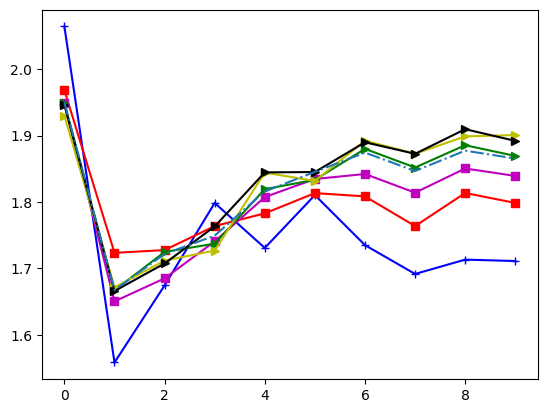

In [54]:
oe = np.asarray(oe)
doe = np.diff(oe,axis=0)
# plt.plot(np.mean(doe[:,ff==20],1),'-+')
# plt.plot(np.mean(doe[:,ff==40],1),'-s')
# plt.plot(np.mean(doe[:,ff==100],1),'->')
plt.plot(np.mean(oe[:,ff==20],1),'b-+')
plt.plot(np.mean(oe[:,ff==40],1),'r-s')
plt.plot(np.mean(oe[:,ff==80],1),'m-s')

plt.plot(np.mean(oe[:,ff==100],1),'g->')
plt.plot(np.mean(oe[:,ff==180],1),'y->')
plt.plot(np.mean(oe[:,ff==0],1),'k->')

plt.plot(np.mean(oe,1),'-.')

In [46]:
out_ent.keys()

dict_keys([140, 180, 100, 160, 120, 60, 20, 80, 0, 40])

In [52]:
from scipy.stats import spearmanr

In [53]:
spearmanr(ff,szf)

SpearmanrResult(correlation=0.037267829017199904, pvalue=0.0034690056783663924)

In [73]:
fff = {}
for i,f in enumerate(files):
    fff[str(f)] = ff[i]

In [75]:
fff

{'data/flowers-102/jpg/image_06734.jpg': 120.0,
 'data/flowers-102/jpg/image_06735.jpg': 100.0,
 'data/flowers-102/jpg/image_06737.jpg': 120.0,
 'data/flowers-102/jpg/image_06742.jpg': 120.0,
 'data/flowers-102/jpg/image_06743.jpg': 100.0,
 'data/flowers-102/jpg/image_06745.jpg': 120.0,
 'data/flowers-102/jpg/image_06746.jpg': 100.0,
 'data/flowers-102/jpg/image_06748.jpg': 120.0,
 'data/flowers-102/jpg/image_06751.jpg': 100.0,
 'data/flowers-102/jpg/image_06752.jpg': 120.0,
 'data/flowers-102/jpg/image_06753.jpg': 120.0,
 'data/flowers-102/jpg/image_06756.jpg': 120.0,
 'data/flowers-102/jpg/image_06757.jpg': 120.0,
 'data/flowers-102/jpg/image_06758.jpg': 120.0,
 'data/flowers-102/jpg/image_06759.jpg': 120.0,
 'data/flowers-102/jpg/image_06760.jpg': 160.0,
 'data/flowers-102/jpg/image_06764.jpg': 120.0,
 'data/flowers-102/jpg/image_06769.jpg': 120.0,
 'data/flowers-102/jpg/image_06770.jpg': 0.0,
 'data/flowers-102/jpg/image_06772.jpg': 120.0,
 'data/flowers-102/jpg/image_05087.jpg': 1

(0,) nan
(16,) 0.03473798844136412
(12,) 0.04337094456568047
(31,) 0.03721016469374133
(88,) 0.042579495056690196
(145,) 0.04228906797731776
(317,) 0.04503864385109506
(110,) 0.04136724313123593
(37,) 0.04367583162770001
(32,) 0.03982807676097364
788


/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


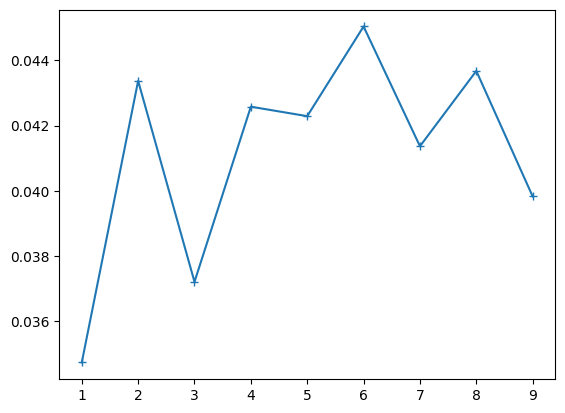

In [102]:
a = []
s = 0
v = []
for k in I.keys():
    print(I[k].shape,np.mean(szf[I[k]]))
    #plt.plot(szf[I[k]],'.')
    a.append(np.mean(szf[I[k]]))
    v.append(np.std(szf[I[k]]))
    s+=I[k].shape[0]
plt.plot(a,'-+')
print(s)

In [103]:
v

[nan,
 0.008646081683852606,
 0.01126362938229367,
 0.013237055750673786,
 0.012530828961429026,
 0.011286379566248221,
 0.012828659822624985,
 0.012453244735097025,
 0.009295218510572916,
 0.013071913690721797]

with open('flowers/iter4/res.pkl','rb') as fp:
    dics = pickle.load(fp)

In [80]:
def get(dics,use_ent=False):
    acc = []
    ran = []
    ran_n = []
    lo = []
    lo_n = []
    hi = []
    hi_n = []
    bal = []
    bal_n = []
    hipr = []
    hipr_n = []
    lopr = []
    lopr_n = []
    hikm = []
    hikm_n = []
    lokm = []
    lokm_n = []
    for l in dics.keys():
            #print(l)
            if 'Ran_' in l:
                ran.append(dics[l])
                if use_ent:
                    ran_n.append(float(l.split('_')[1])*float(l.split('_')[2]))
                else:
                    ran_n.append(int(l.split('_')[1]))
            if 'Hi_' in l:
                hi.append(dics[l])
                if use_ent:
                    hi_n.append(float(l.split('_')[1])*float(l.split('_')[2]))
                else:
                    hi_n.append(int(l.split('_')[1]))
            if 'Lo_' in l:
                lo.append(dics[l])
                if use_ent:
                    lo_n.append(float(l.split('_')[1])*float(l.split('_')[2]))
                else:
                    lo_n.append(int(l.split('_')[1]))
            if 'Bal_' in l:
                bal.append(dics[l])
                bal_n.append(int(l.split('_')[1]))
            if 'HiPr' in l:
                hipr.append(dics[l])
                hipr_n.append(int(l.split('_')[1]))
            if 'LoPr' in l:
                lopr.append(dics[l])
                lopr_n.append(int(l.split('_')[1]))
            if 'HiKm' in l:
                hikm.append(dics[l])
                hikm_n.append(int(l.split('_')[1]))
            if 'LoKm' in l:
                lokm.append(dics[l])
                lokm_n.append(int(l.split('_')[1]))
    ran = np.asarray(ran)
    ran_n = np.asarray(ran_n)
    hi = np.asarray(hi)
    hi_n = np.asarray(hi_n)
    lo = np.asarray(lo)
    lo_n = np.asarray(lo_n)
    bal = np.asarray(bal)
    bal_n = np.asarray(bal_n)
    hipr = np.asarray(hipr)
    hipr_n = np.asarray(hipr_n)
    lopr = np.asarray(lopr)
    lopr_n = np.asarray(lopr_n)
    hikm = np.asarray(hikm)
    hikm_n = np.asarray(hikm_n)
    lokm = np.asarray(lokm)
    lokm_n = np.asarray(lokm_n)
    return ran, ran_n, hi, hi_n, lo, lo_n

In [94]:
import glob
dirs = glob.glob('flowers/ft_iter//*/')
dics = {}
for d in dirs:
    name = d.split('/')[2]
    if name not in dics:
#         if not os.path.exists(d+'/checkpoint/ckpt_180.pth'):
#             print("DOES NOT CNV")
#             continue
        if 'Ran_' in name or 'Lo_' in name or 'Hi_' in name :
            checkpoint = torch.load(d+'/checkpoint/ckpt.pth')
            model.load_state_dict(checkpoint['net'])
            print(name)
            pred,o = test()
            dics[name] = o

Lo_3331_0.036_0.009
Average Loss:  tensor(0.0007, device='cuda:0')   Accuracy:  844  /  1020    82 %
Hi_3650_0.049_0.012
Average Loss:  tensor(0.0008, device='cuda:0')   Accuracy:  868  /  1020    85 %
Hi_2419_0.052_0.012
Average Loss:  tensor(0.0009, device='cuda:0')   Accuracy:  841  /  1020    82 %
Hi_3331_0.049_0.012
Average Loss:  tensor(0.0009, device='cuda:0')   Accuracy:  852  /  1020    83 %
Lo_2725_0.035_0.008
Average Loss:  tensor(0.0007, device='cuda:0')   Accuracy:  801  /  1020    78 %
Lo_3650_0.036_0.009
Average Loss:  tensor(0.0006, device='cuda:0')   Accuracy:  865  /  1020    84 %
Hi_3050_0.050_0.012
Average Loss:  tensor(0.0007, device='cuda:0')   Accuracy:  834  /  1020    81 %
Hi_2106_0.053_0.012
Average Loss:  tensor(0.0010, device='cuda:0')   Accuracy:  793  /  1020    77 %
Ran_2725_0.043_0.013
Average Loss:  tensor(0.0007, device='cuda:0')   Accuracy:  849  /  1020    83 %
Ran_2419_0.043_0.013
Average Loss:  tensor(0.0008, device='cuda:0')   Accuracy:  849  /  1

In [95]:
with open('flowers/ft_iter///res.pkl','wb') as fp:
    pickle.dump(dics,fp)

In [96]:
with open('flowers/ft_iter////res.pkl','rb') as fp:
    dics = pickle.load(fp)
with open('flowers/ft_iter0///res.pkl','rb') as fp:
    dics1 = pickle.load(fp)
with open('flowers/ft_iter1//res.pkl','rb') as fp:
    dics2 = pickle.load(fp)
# with open('flowers//iter4/res.pkl','rb') as fp:
#     dics3 = pickle.load(fp)
# with open('flowers//iter/res.pkl','rb') as fp:
#     dics4 = pickle.load(fp)

for n in np.sort(list(dics.keys())):
    print(n,dics[n])
print("a ")
for n in np.sort(list(dics1.keys())):
    print(n,dics1[n])
print("a ")
# for n in np.sort(list(dics2.keys())):
#     print(n,dics2[n])
# print("a ")
# for n in np.sort(list(dics3.keys())):
#     print(n,dics3[n])
    

In [85]:
ran, ran_n, hi, hi_n, lo, lo_n = get(dics3)

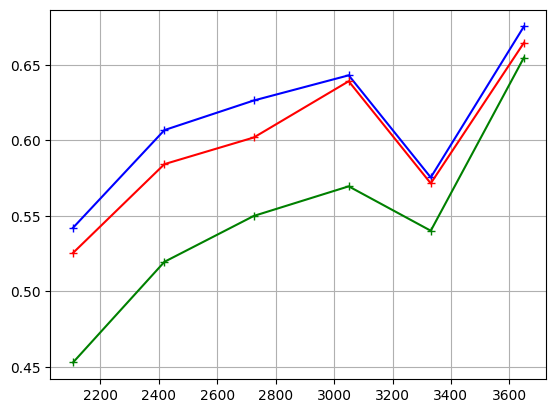

In [86]:
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
#plt.plot(bal_n[np.argsort(bal_n)],bal[np.argsort(bal_n)],'k-+')
# plt.plot(hipr_n[np.argsort(hipr_n)],hipr[np.argsort(hipr_n)],'k-+')
# plt.plot(lopr_n[np.argsort(lopr_n)],lopr[np.argsort(lopr_n)],'c-+')

# plt.plot(hikm_n[np.argsort(hikm_n)],hikm[np.argsort(hikm_n)],'r-s')
# plt.plot(lokm_n[np.argsort(lokm_n)],lokm[np.argsort(lokm_n)],'g-p')

plt.grid('on')

In [87]:
ran, ran_n, hi, hi_n, lo, lo_n = get(dics4)

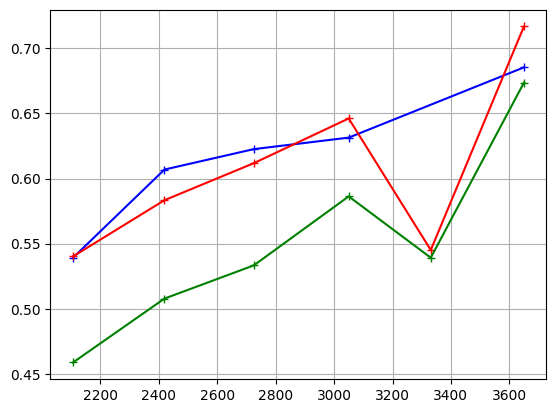

In [88]:
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
#plt.plot(bal_n[np.argsort(bal_n)],bal[np.argsort(bal_n)],'k-+')
# plt.plot(hipr_n[np.argsort(hipr_n)],hipr[np.argsort(hipr_n)],'k-+')
# plt.plot(lopr_n[np.argsort(lopr_n)],lopr[np.argsort(lopr_n)],'c-+')

# plt.plot(hikm_n[np.argsort(hikm_n)],hikm[np.argsort(hikm_n)],'r-s')
# plt.plot(lokm_n[np.argsort(lokm_n)],lokm[np.argsort(lokm_n)],'g-p')

plt.grid('on')

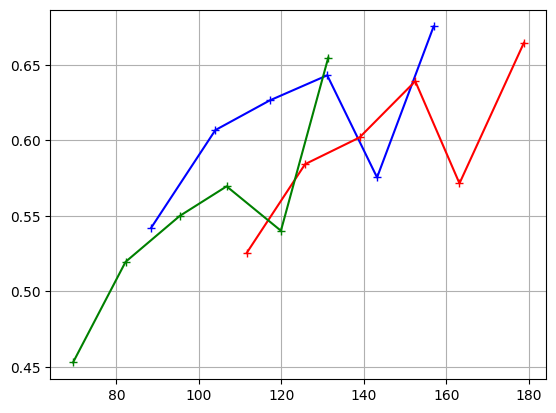

In [83]:
ran, ran_n, hi, hi_n, lo, lo_n = get(dics3,True)
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
plt.grid('on')

In [97]:
key = []
for k in dics.keys():
    key.append('_'.join(k.split('_')[:2]))
for k in dics1.keys():
    key.append('_'.join(k.split('_')[:2]))
for k in dics2.keys():
    key.append('_'.join(k.split('_')[:2]))
# for k in dics3.keys():
#     key.append('_'.join(k.split('_')[:2]))
_dics = {}
for k in key:
    v = []
    for l in dics.keys():
        if k in l:
            v.append(dics[l])
    for l in dics1.keys():
        if k in l:
            v.append(dics1[l])
    for l in dics2.keys():
        if k in l:
            v.append(dics2[l])
#     for l in dics3.keys():
#         if k in l:
#             v.append(dics3[l])
    _dics[k] = np.mean(v)
    

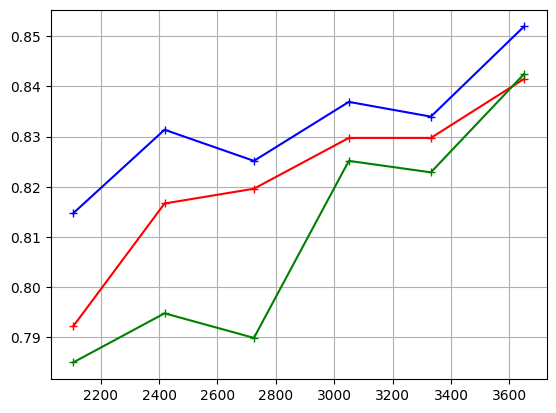

In [98]:
ran, ran_n, hi, hi_n, lo, lo_n = get(_dics)
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
plt.grid('on')

In [89]:
key = []
for k in dics.keys():
    key.append('_'.join(k.split('_')[:2]))
for k in dics1.keys():
    key.append('_'.join(k.split('_')[:2]))
for k in dics2.keys():
    key.append('_'.join(k.split('_')[:2]))
for k in dics3.keys():
    key.append('_'.join(k.split('_')[:2]))
_dics = {}
for k in key:
    v = []
    for l in dics.keys():
        if k in l:
            v.append(dics[l])
            n = l
    for l in dics1.keys():
        if k in l:
            v.append(dics1[l])
            n = l
    for l in dics2.keys():
        if k in l:
            v.append(dics2[l])
            n = l
    for l in dics3.keys():
        if k in l:
            v.append(dics3[l])
            n = l
    _dics[n] = np.mean(v)
    

Hi_1799_0.054_0.012
Hi_3650_0.049_0.012
Hi_1194_0.057_0.012
Hi_2419_0.052_0.012
Ran_1194_0.042_0.013
Lo_3650_0.036_0.009
Ran_2419_0.043_0.013
Hi_571_0.061_0.013
Hi_3050_0.050_0.012
Lo_1799_0.032_0.007
Lo_1194_0.031_0.007
Ran_1799_0.042_0.013
Ran_571_0.042_0.013
Lo_571_0.028_0.006
Ran_4259_0.043_0.013
Lo_3050_0.035_0.009
Hi_5487_0.044_0.012
Ran_5487_0.043_0.013
Lo_2419_0.034_0.008
Lo_5487_0.041_0.011
Ran_633_0.042_0.013
Lo_4259_0.038_0.010
Hi_4259_0.047_0.012
Ran_3050_0.043_0.013
Lo_3331_0.036_0.009
Hi_3331_0.049_0.012
Lo_2725_0.035_0.008
Hi_2106_0.053_0.012
Ran_2106_0.042_0.013
Ran_3650_0.043_0.013
Hi_2725_0.051_0.012
Lo_2106_0.033_0.008
Ran_3331_0.043_0.013
Ran_2725_0.043_0.013


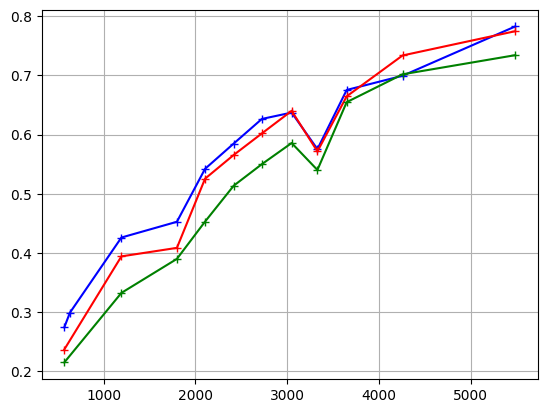

In [90]:
ran, ran_n, hi, hi_n, lo, lo_n = get(_dics)
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
plt.grid('on')

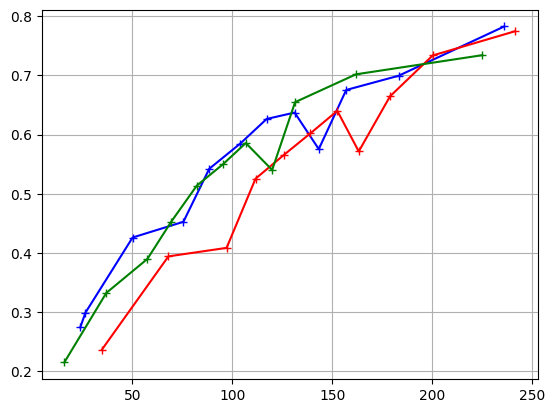

In [93]:
ran, ran_n, hi, hi_n, lo, lo_n = get(_dics,True)
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
plt.grid('on')

In [25]:
outputs= []
def hook2(module, input, output):
    #print(len(output))
    outputs.append(output)
#a = model.layer4[1].conv2.register_forward_hook(hook2)
b = model.module.avgpool.register_forward_hook(hook2)

In [73]:
checkpoint = torch.load('flowers/DefTest_6149_0.043_0.013//checkpoint/ckpt.pth')
model.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [74]:
outputs = []
pred,o = test()

Average Loss:  tensor(0.0013, device='cuda:0')   Accuracy:  797  /  1020    78 %


In [75]:
feat = []
for o in outputs:
        A = o.cpu().numpy()
        for i in range(A.shape[0]):
            a = np.squeeze(A[i,:])
            feat.append(a)
feat = np.asarray(feat)

In [76]:
feat.shape

(1020, 512)

In [77]:
from sklearn.neighbors import kneighbors_graph

In [78]:
G = kneighbors_graph(feat,30,mode='distance')

In [30]:
adj = G.toarray()>0

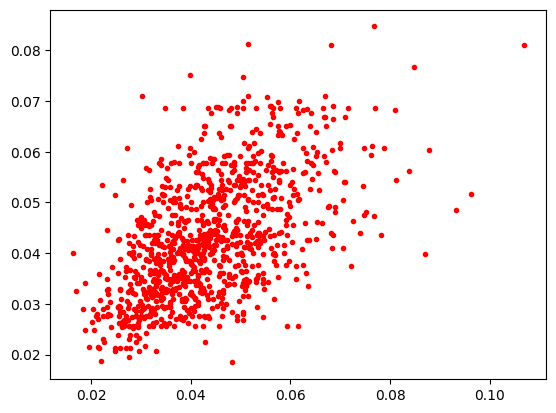

In [31]:
for i in np.arange(len(szf)):
    plt.plot(szf[i],np.mean(szf[np.where(adj[i,:])]),'r.')
    #plt.plot(szf[i],np.std(szf[np.where(adj[i,:])]),'g.')

In [49]:
print(np.mean(szf),np.mean(szf[pred==labels]),np.mean(szf[pred!=labels]))

0.04330127729769089 0.043045872449138156 0.04421409193579197


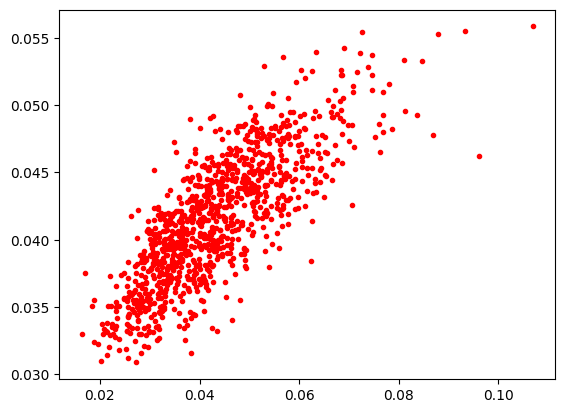

In [57]:
for i in np.arange(len(szf)):
    plt.plot(szf[i],np.mean(szf[np.where(adj[i,:])]),'r.')
    #plt.plot(szf[i],np.std(szf[np.where(adj[i,:])]),'g.')

In [58]:
print(np.mean(szf),np.mean(szf[pred==labels]),np.mean(szf[pred!=labels]))

0.04330127729769089 0.04353913189139553 0.04282974099789049


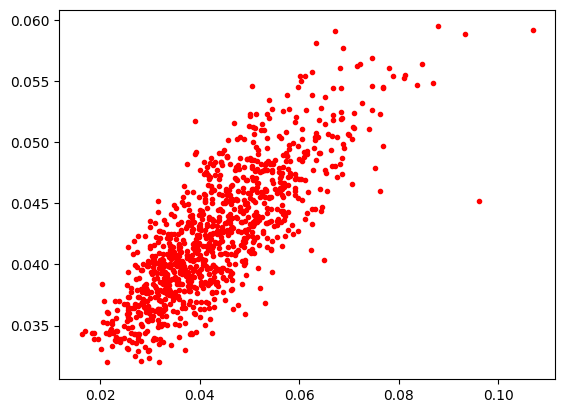

In [66]:
for i in np.arange(len(szf)):
    plt.plot(szf[i],np.mean(szf[np.where(adj[i,:])]),'r.')
    #plt.plot(szf[i],np.std(szf[np.where(adj[i,:])]),'g.')

In [67]:
print(np.mean(szf),np.mean(szf[pred==labels]),np.mean(szf[pred!=labels]))

0.04330127729769089 0.04196155018249605 0.045843713982208385


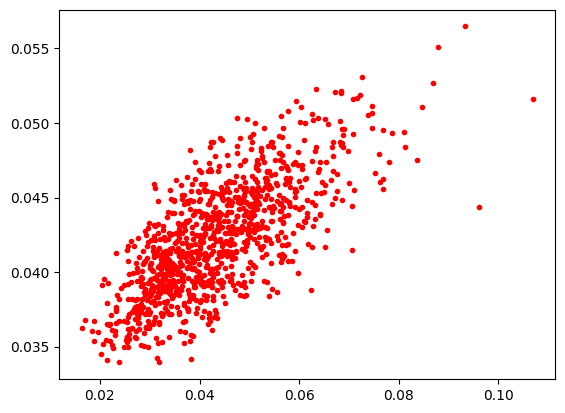

In [75]:
for i in np.arange(len(szf)):
    plt.plot(szf[i],np.mean(szf[np.where(adj[i,:])]),'r.')
    #plt.plot(szf[i],np.std(szf[np.where(adj[i,:])]),'g.')

In [76]:
print(np.mean(szf),np.mean(szf[pred==labels]),np.mean(szf[pred!=labels]))

0.04330127729769089 0.043082044147130474 0.04375762666547378


In [32]:
files = ['flowers/iter/Hi_3650_0.049_0.012/checkpoint/ckpt.pth',
         'flowers/iter/Lo_3650_0.036_0.009/checkpoint/ckpt.pth',
         'flowers/iter/Ran_3650_0.043_0.013//checkpoint/ckpt.pth',
         #'flowers/DefTest_6149_0.043_0.013/checkpoint/ckpt.pth'
        ]
F = {}
M = {}
for f in files:
    name = '_'.join(f.split('/')[2].split('_')[:1])
    checkpoint = torch.load(f)
    model.load_state_dict(checkpoint['net'])
    print(name)
    outputs = []
    pred,o1 = test()
    feat = []
    for o in outputs:
            A = o.cpu().numpy()
            for i in range(A.shape[0]):
                a = np.squeeze(A[i,:])
                feat.append(a)
    feat = np.asarray(feat)
    G = kneighbors_graph(feat,1)
    adj = G.toarray()>0
    m = []
    for i in np.arange(len(szf)):
        m.append(np.mean(szf[np.where(adj[i,:])]))
    M[name] = m
    F[name]  = feat

Hi
Average Loss:  tensor(0.0020, device='cuda:0')   Accuracy:  731  /  1020    71 %
Lo
Average Loss:  tensor(0.0025, device='cuda:0')   Accuracy:  687  /  1020    67 %
Ran
Average Loss:  tensor(0.0026, device='cuda:0')   Accuracy:  699  /  1020    68 %


In [36]:
np.where(adj[0,:])

(array([8]),)

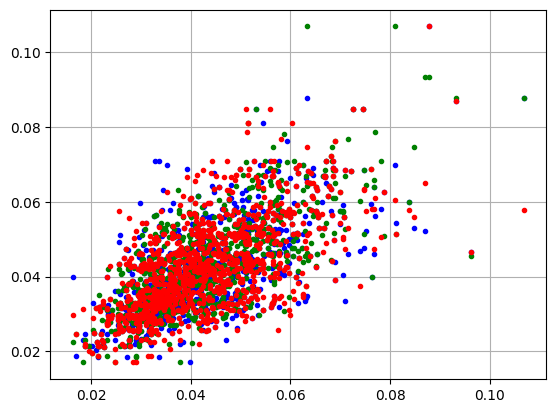

In [34]:
plt.plot(szf,M['Hi'],'b.')
plt.plot(szf,M['Lo'],'g.')
plt.plot(szf,M['Ran'],'r.')
plt.grid('on')


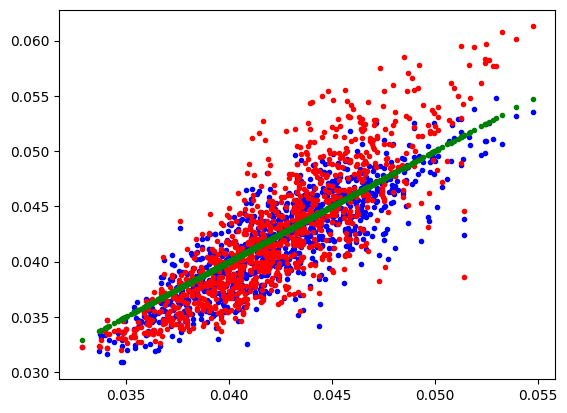

In [31]:
plt.plot(M['Ran'],M['Hi'],'b.')
plt.plot(M['Ran'],M['Lo'],'r.')
plt.plot(M['Ran'],M['Ran'],'g.')


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

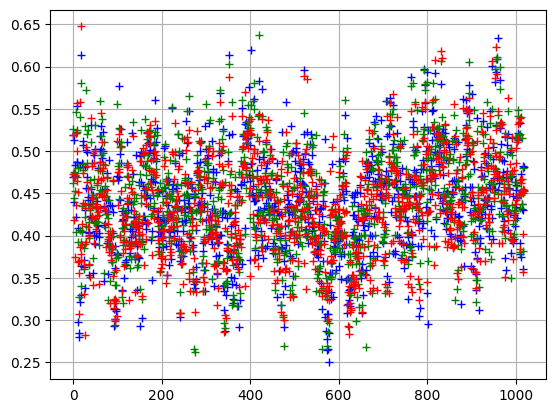

In [34]:
plt.plot(np.diag(cosine_similarity(F['Hi'],F['Ran'])),'b+')
plt.plot(np.diag(cosine_similarity(F['Lo'],F['Ran'])),'g+')
plt.plot(np.diag(cosine_similarity(F['Lo'],F['Hi'])),'r+')
plt.grid('on')

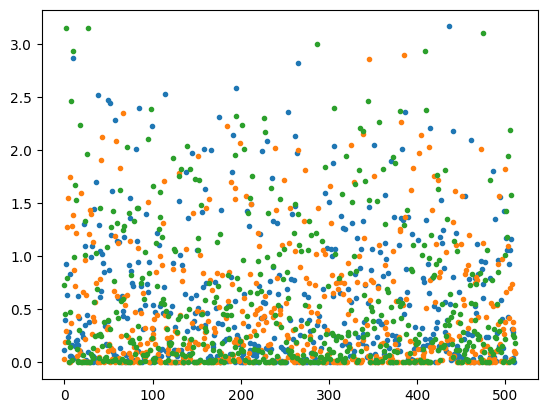

In [42]:
plt.plot(F['Hi'][210],'.')
plt.plot(F['Lo'][210],'.')
plt.plot(F['Ran'][210],'.')

In [43]:
feat = F['Ran']

In [44]:
feat.shape

(1020, 512)

In [45]:
G = kneighbors_graph(feat,30)

In [47]:
G.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [53]:
G1 = kneighbors_graph(feat,30,mode='distance')

In [55]:
np.where(G1.toarray()[100,:]>0)

(array([  5,   7,   8,  11,  16, 181, 183, 185, 211, 306, 393, 397, 420,
        421, 475, 683, 721, 760, 793, 796, 815, 819, 820, 825, 835, 838,
        852, 955, 958, 964]),)

In [58]:
np.where(G.toarray()[100,:]>0)

(array([ 13,  31, 103, 107, 135, 178, 331, 359, 363, 365, 367, 388, 414,
        429, 612, 618, 714, 724, 774, 779, 793, 831, 840, 846, 860, 931,
        938, 946, 958, 983]),)

In [67]:
adj = G1.toarray()

In [68]:
from sknetwork.ranking import PageRank

In [71]:
pr = PageRank()

In [77]:
a = pr.fit_predict(G1.toarray())

In [78]:
b = pr.fit_predict(G.toarray())

In [80]:
from sknetwork.data import karate_club, painters, movie_actor


In [81]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency

In [85]:
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)

In [86]:
scores

array([0.09683432, 0.05270896, 0.05700985, 0.03583685, 0.02204314,
       0.02922028, 0.02922028, 0.02453786, 0.02983147, 0.01434684,
       0.02204314, 0.00959139, 0.01467138, 0.0296205 , 0.01460911,
       0.01460911, 0.01682548, 0.01460544, 0.01460911, 0.01968808,
       0.01460911, 0.01460544, 0.01460911, 0.03156737, 0.02103777,
       0.02096294, 0.01505913, 0.02566555, 0.01957931, 0.02631547,
       0.02465682, 0.0372688 , 0.07127235, 0.10032824])

In [49]:
import networkx as nx

In [90]:
G1 = nx.from_numpy_array(G.toarray()+G.toarray().T)

In [91]:
nx.is_connected(G1)

True

In [92]:
nx.diameter(G1)

5

In [93]:
nx.average_clustering(G1)

0.3716489732444605

In [79]:
files = glob.glob('flowers/DefTest_6149_0.043_0.013/checkpoint/*_*.pth')
out_ent = {}
out_med = {}
out_cov = {}
acc = {}
for f in files:
    name = f.split('/')[-1].split('_')[1].split('.')[0]
    checkpoint = torch.load(f)
    model.load_state_dict(checkpoint['net'])
    #print(name)
    outputs = []
    pred,o1 = test()
    feat = []
    for o in outputs:
            A = o.cpu().numpy()
            for i in range(A.shape[0]):
                a = np.squeeze(A[i,:])
                feat.append(a)
    feat = np.asarray(feat)
    out_ent[int(name)] = oent(feat)
    out_cov[int(name)] = np.std(feat,1)/np.mean(feat,1)
    out_med[int(name)] = np.median(feat,1)
    acc[int(name)] = o1

KeyboardInterrupt: 

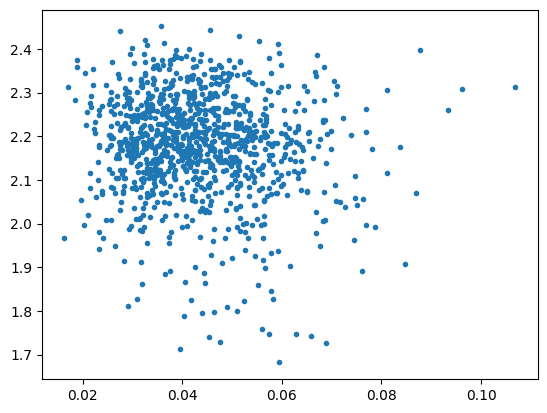

In [76]:
plt.plot(szf,oent(feat),'.')

In [94]:
from  scipy.special import softmax
from scipy.stats import entropy

In [147]:
s = softmax(feat,1)

In [148]:
e = []
for _s in s:
    e.append(entropy(_s))

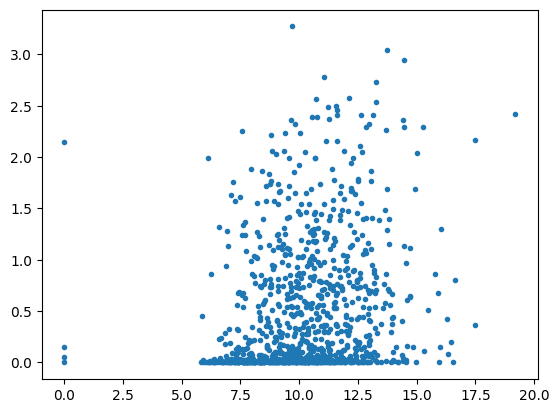

In [149]:
plt.plot(kmd,e,'.')

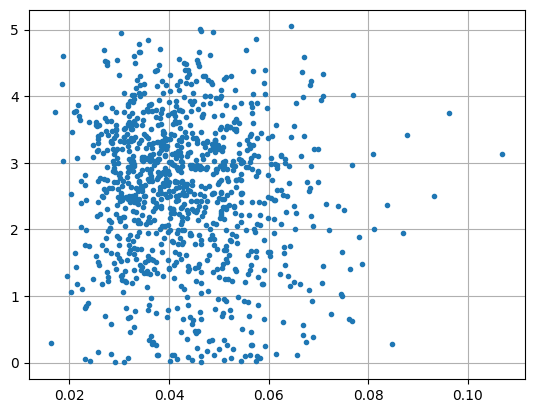

In [122]:
plt.plot(szf,e,'.')
plt.grid('on')

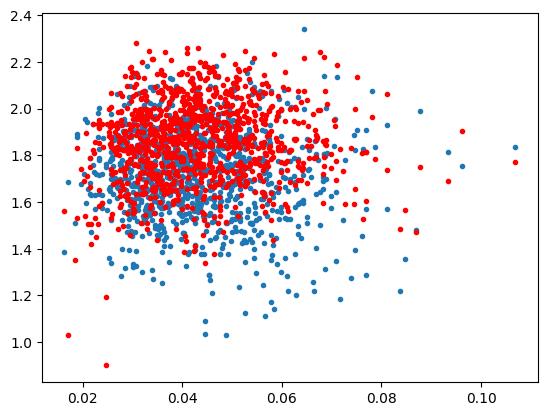

In [43]:
plt.plot(szf,oent(feat),'.')
plt.plot(szf,out_ent[180],'r.')


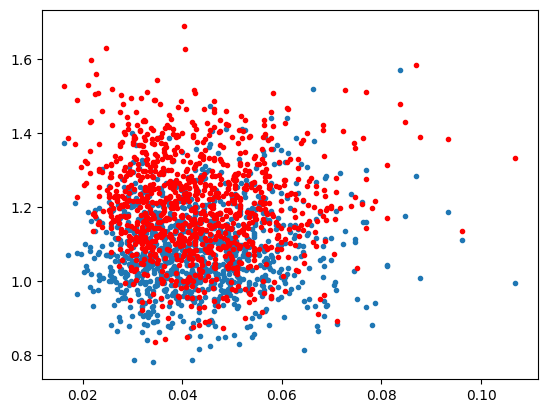

In [44]:
plt.plot(szf,np.std(feat,1)/np.mean(feat,1),'.')
plt.plot(szf,out_cov[180],'r.')

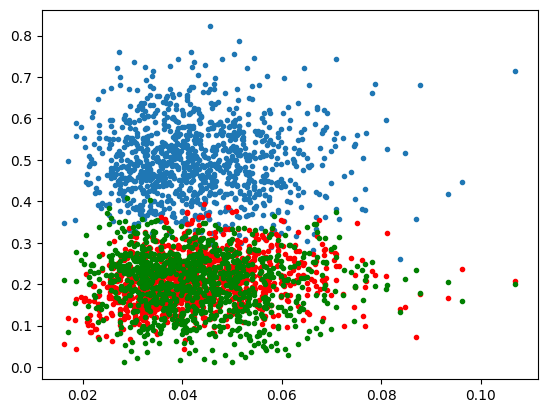

In [46]:
plt.plot(szf,np.median(feat,1),'.')
plt.plot(szf,out_med[180],'r.')
plt.plot(szf,out_med[0],'g.')

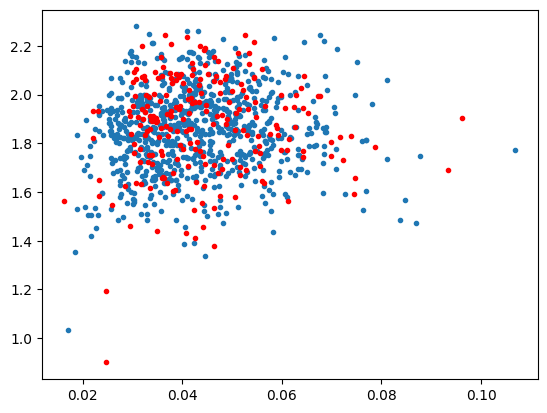

In [35]:
plt.plot(szf[np.asarray(pred)==labels],out_ent[180][np.asarray(pred)==labels],'.')
plt.plot(szf[np.asarray(pred)!=labels],out_ent[180][np.asarray(pred)!=labels],'r.')

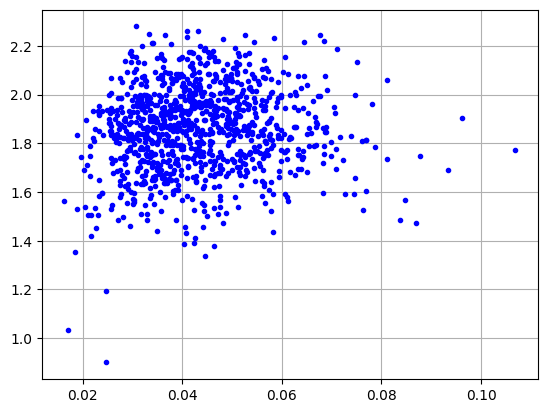

In [44]:

#plt.plot(szf,out_ent[0],'r.')
#plt.plot(szf,out_ent[20],'g.')
plt.plot(szf,out_ent[180],'b.')
plt.grid('on')

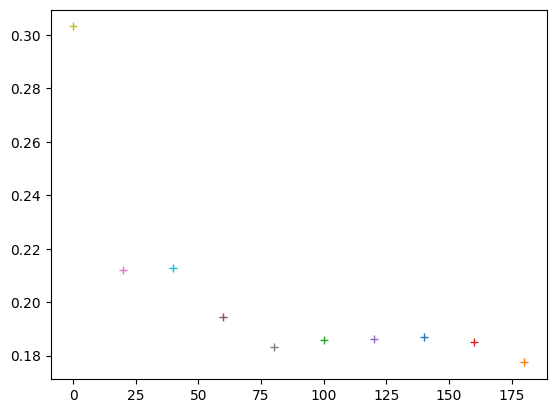

In [40]:
for k in out_ent.keys():
    plt.plot(k,np.std(out_ent[k]),'+')

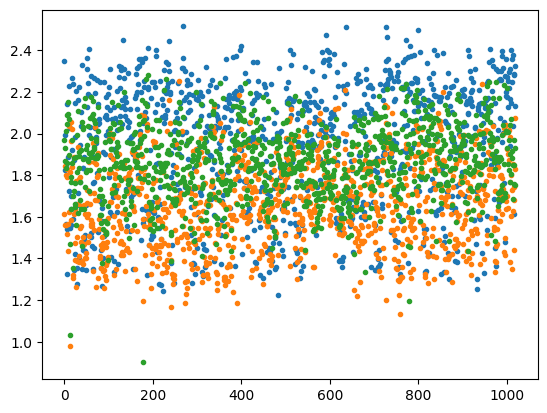

In [40]:
plt.plot(out_ent[0],'.')
plt.plot(out_ent[20],'.')
plt.plot(out_ent[180],'.')

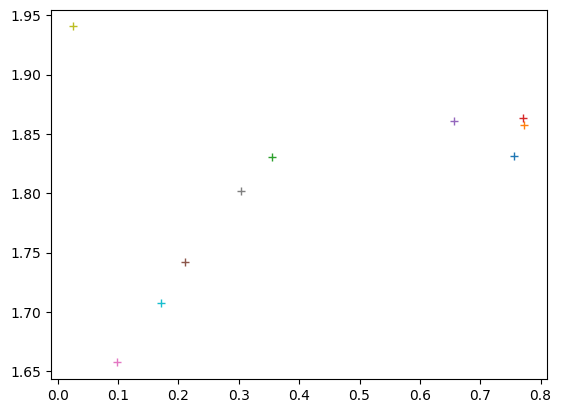

In [36]:
for k in out_ent.keys():
    plt.plot(acc[k],np.mean(out_ent[k]),'+')

In [89]:
from sklearn.neighbors import kneighbors_graph

G = kneighbors_graph(feat,100,mode='distance')

from sknetwork.ranking import PageRank

pagerank = PageRank()
scores = pagerank.fit_predict(G.toarray())



ind = np.argsort(scores)[::-1]

In [92]:
G.toarray() == G.toarray().transpose()

array([[ True, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [17]:
files = test_loader.dataset._image_files

In [18]:
dic = {}
for i,f in enumerate(files):
    dic[str(f)] = np.log10(scores)[i]

(array([920., 746., 639., 522., 379., 354., 323., 272., 251., 255., 205.,
        222., 195., 171., 171., 142.,  93.,  93.,  66.,  53.,  35.,  22.,
         12.,   5.,   3.]),
 array([-4.61271323, -4.5275678 , -4.44242238, -4.35727695, -4.27213152,
        -4.18698609, -4.10184066, -4.01669523, -3.9315498 , -3.84640437,
        -3.76125894, -3.67611351, -3.59096808, -3.50582266, -3.42067723,
        -3.3355318 , -3.25038637, -3.16524094, -3.08009551, -2.99495008,
        -2.90980465, -2.82465922, -2.73951379, -2.65436836, -2.56922294,
        -2.48407751]),
 <BarContainer object of 25 artists>)

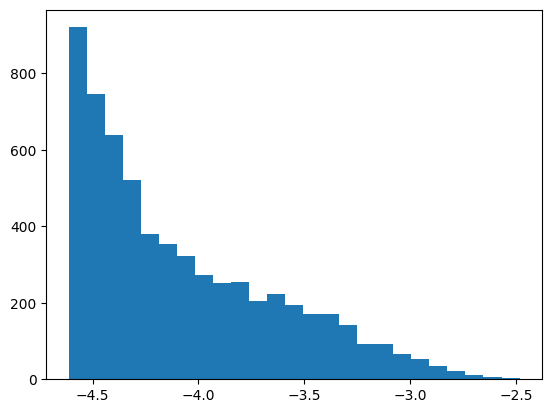

In [19]:
plt.hist(np.log10(scores),25)

In [20]:
import pickle as pkl
with open('data/flowers-102/page_rank_test.pkl','wb') as fp:
    pkl.dump(dic,fp)

In [83]:
dic['data/flowers-102/jpg/image_06765.jpg']

-3.5795459581259226

In [84]:
np.sort(np.log10(scores))

array([-3.83250891, -3.83250891, -3.83250891, ..., -2.15813698,
       -2.15048817, -2.1340762 ])

In [62]:
import pickle as pkl
with open('data/flowers-102/page_rank_test.pkl','rb') as fp:
    dic = pkl.load(fp)

In [109]:
sdic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}

In [110]:
for k in sdic.keys():
    print(k,sdic[k])

data/flowers-102/jpg/image_05126.jpg -4.612713233988967
data/flowers-102/jpg/image_05630.jpg -4.612713233988967
data/flowers-102/jpg/image_05647.jpg -4.612713233988967
data/flowers-102/jpg/image_03317.jpg -4.612713233988967
data/flowers-102/jpg/image_06409.jpg -4.612713233988967
data/flowers-102/jpg/image_04005.jpg -4.612713233988967
data/flowers-102/jpg/image_04029.jpg -4.612713233988967
data/flowers-102/jpg/image_06056.jpg -4.612713233988967
data/flowers-102/jpg/image_06671.jpg -4.612713233988967
data/flowers-102/jpg/image_03828.jpg -4.612713233988967
data/flowers-102/jpg/image_06589.jpg -4.612713233988967
data/flowers-102/jpg/image_06896.jpg -4.612713233988967
data/flowers-102/jpg/image_04376.jpg -4.612713233988967
data/flowers-102/jpg/image_05801.jpg -4.612713233988967
data/flowers-102/jpg/image_02200.jpg -4.612713233988967
data/flowers-102/jpg/image_02341.jpg -4.612713233988967
data/flowers-102/jpg/image_02405.jpg -4.612713233988967
data/flowers-102/jpg/image_02430.jpg -4.61271323

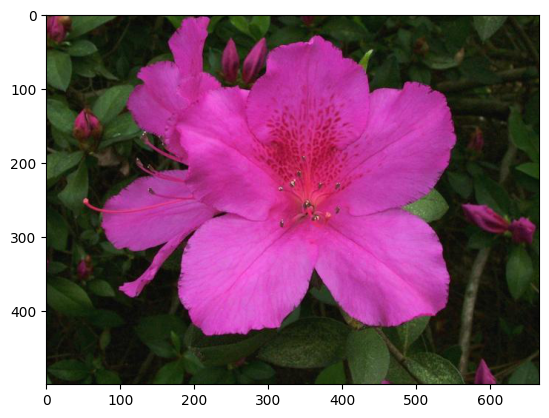

In [113]:
plt.imshow(plt.imread('data/flowers-102/jpg/image_03624.jpg'))

In [114]:
len(sdic)

6149

In [115]:
len(scores)

1020

In [121]:
m = []
for i in range(102):
    m.append(np.mean(np.log10(scores)[labels==i]))

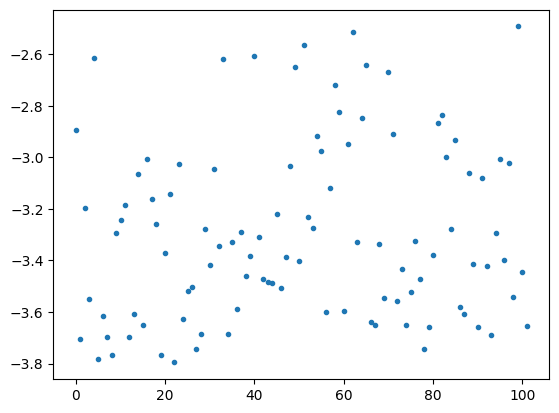

In [123]:
plt.plot(m,'.')

In [120]:
scores

array([0.00095778, 0.00017666, 0.00043264, ..., 0.00015232, 0.00017375,
       0.0001745 ])

In [83]:
import torch
model = torch.hub.load('facebookresearch/swav:main', 'resnet50')

Using cache found in /home/ubuntu/.cache/torch/hub/facebookresearch_swav_main
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [84]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [85]:
outputs= []
def hook2(module, input, output):
    #print(len(output))
    outputs.append(output)
#a = model.layer4[1].conv2.register_forward_hook(hook2)
b = model.avgpool.register_forward_hook(hook2)

In [86]:
outputs = []
pred,o = test()

Average Loss:  tensor(0.0068, device='cuda:0')   Accuracy:  0  /  1020    0 %


In [87]:
feat = []
for o in outputs:
        A = o.cpu().numpy()
        for i in range(A.shape[0]):
            a = np.squeeze(A[i,:])
            feat.append(a)
feat = np.asarray(feat)

In [88]:
feat.shape

(1020, 2048)

In [89]:
from sklearn.neighbors import kneighbors_graph

G = kneighbors_graph(feat,30,mode='distance')

from sknetwork.ranking import PageRank

pagerank = PageRank()
scores = pagerank.fit_predict(G.toarray())



ind = np.argsort(scores)[::-1]

(array([69., 78., 65., 58., 50., 57., 45., 57., 54., 55., 45., 49., 45.,
        49., 34., 42., 26., 40., 31., 14., 15., 21., 11.,  8.,  2.]),
 array([-3.83250891, -3.76536491, -3.69822091, -3.6310769 , -3.5639329 ,
        -3.4967889 , -3.42964489, -3.36250089, -3.29535689, -3.22821288,
        -3.16106888, -3.09392487, -3.02678087, -2.95963687, -2.89249286,
        -2.82534886, -2.75820486, -2.69106085, -2.62391685, -2.55677285,
        -2.48962884, -2.42248484, -2.35534084, -2.28819683, -2.22105283,
        -2.15390883]),
 <BarContainer object of 25 artists>)

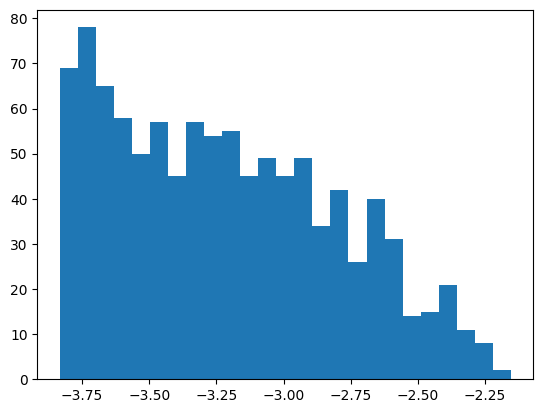

In [132]:
plt.hist(np.log10(scores),25)

In [136]:
np.asarray(files)[np.argsort(np.log10(scores))]

array([PosixPath('data/flowers-102/jpg/image_00524.jpg'),
       PosixPath('data/flowers-102/jpg/image_06825.jpg'),
       PosixPath('data/flowers-102/jpg/image_06841.jpg'), ...,
       PosixPath('data/flowers-102/jpg/image_05730.jpg'),
       PosixPath('data/flowers-102/jpg/image_04761.jpg'),
       PosixPath('data/flowers-102/jpg/image_04719.jpg')], dtype=object)

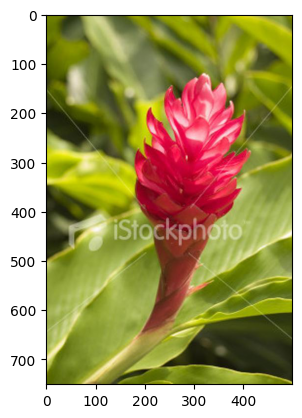

In [140]:
plt.imshow(plt.imread('data/flowers-102/jpg/image_06825.jpg'))

In [141]:
len(feat)

1020

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=102, random_state=0, n_init="auto").fit(feat)
kmeans.labels_


array([72, 49,  3, ...,  5, 17, 65], dtype=int32)

In [132]:
np.unique(kmeans.labels_,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=int32),
 array([ 3, 24, 15, 19,  2,  6, 12, 12, 22, 11, 17,  2, 24,  7,  5, 13,  3,
         9, 14,  8,  8, 18, 10, 10, 30, 13,  3,  3, 11, 11, 24,  2,  9, 11,
        24,  8, 13,  4,  7,  3, 13,  9,  9,  6,  8, 18,  7,  5, 36, 10, 15,
        11,  7, 11, 11,  2, 28, 15,  1, 10, 16,  7,  8,  6,  4,  3,  1, 13,
         2, 10, 10,  9, 36,  2, 12,  7,  4,  9,  4,  7,  1, 16,  9,  2,  9,
        24,  5,  3,  6, 11,  1,

In [133]:
kmeans.cluster_centers_.shape

(102, 512)

In [134]:
from sklearn.metrics import pairwise_distances

In [135]:
d = pairwise_distances(feat,kmeans.cluster_centers_)

In [136]:
np.min(d,1)

array([10.542063, 12.700018, 11.06836 , ..., 13.982595, 12.154809,
        9.462337], dtype=float32)

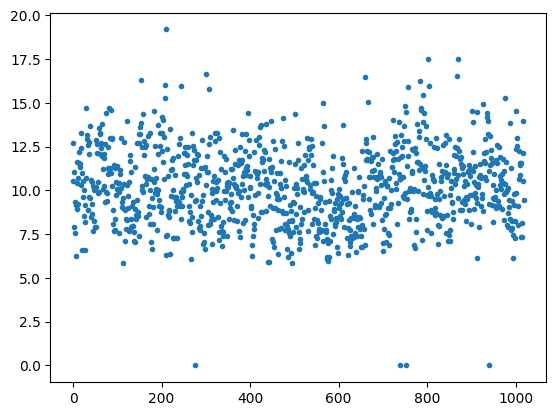

In [137]:
plt.plot(np.min(d,1),'.')

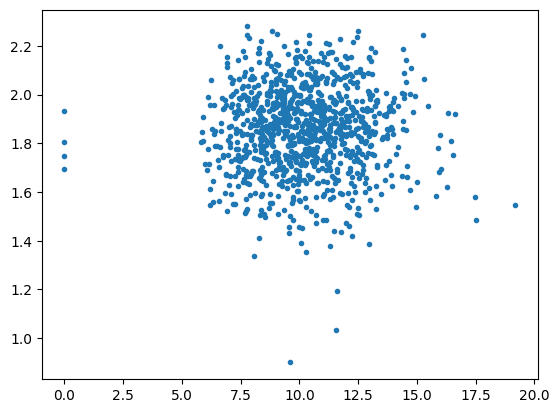

In [140]:
plt.plot(np.min(d,1),out_ent[180],'.')
kmd = np.min(d,1)

In [47]:
len(files)

6149

In [49]:
m = np.min(d,1)

In [55]:
dic = {}
import pickle as pkl
for i,f in enumerate(files):
    dic[str(f)] = m[i]
with open('data/flowers-102/kmeans_dist_test.pkl','wb') as fp:
    pkl.dump(dic,fp)

In [56]:
dic

{'data/flowers-102/jpg/image_06734.jpg': 2.473931,
 'data/flowers-102/jpg/image_06735.jpg': 2.6014125,
 'data/flowers-102/jpg/image_06737.jpg': 3.279949,
 'data/flowers-102/jpg/image_06742.jpg': 3.2249079,
 'data/flowers-102/jpg/image_06743.jpg': 3.117774,
 'data/flowers-102/jpg/image_06745.jpg': 3.0517697,
 'data/flowers-102/jpg/image_06746.jpg': 3.23421,
 'data/flowers-102/jpg/image_06748.jpg': 3.4621062,
 'data/flowers-102/jpg/image_06751.jpg': 3.844465,
 'data/flowers-102/jpg/image_06752.jpg': 3.5809498,
 'data/flowers-102/jpg/image_06753.jpg': 3.5705297,
 'data/flowers-102/jpg/image_06756.jpg': 2.9845564,
 'data/flowers-102/jpg/image_06757.jpg': 3.0116482,
 'data/flowers-102/jpg/image_06758.jpg': 3.400037,
 'data/flowers-102/jpg/image_06759.jpg': 2.9994907,
 'data/flowers-102/jpg/image_06760.jpg': 2.5570252,
 'data/flowers-102/jpg/image_06764.jpg': 2.9692385,
 'data/flowers-102/jpg/image_06769.jpg': 4.3767858,
 'data/flowers-102/jpg/image_06770.jpg': 2.7198822,
 'data/flowers-102/

In [55]:
from scipy.stats import spearmanr

In [56]:
import numpy as np
import pickle

In [57]:
with open('/mnt/efs/Work/data/flowers-102/kmeans_dist_test.pkl','rb') as fp:
    kmeans = pickle.load(fp)
with open('/mnt/efs/Work/data/flowers-102/page_rank_test.pkl','rb') as fp:
    pr = pickle.load(fp)

In [58]:
len(kmeans.keys())

6149

In [65]:
len(fff.keys())

6149

In [66]:
pgr = []
for k in kmeans.keys():
    pgr.append(pr[k])

In [69]:
fff.keys()

dict_keys([PosixPath('data/flowers-102/jpg/image_06734.jpg'), PosixPath('data/flowers-102/jpg/image_06735.jpg'), PosixPath('data/flowers-102/jpg/image_06737.jpg'), PosixPath('data/flowers-102/jpg/image_06742.jpg'), PosixPath('data/flowers-102/jpg/image_06743.jpg'), PosixPath('data/flowers-102/jpg/image_06745.jpg'), PosixPath('data/flowers-102/jpg/image_06746.jpg'), PosixPath('data/flowers-102/jpg/image_06748.jpg'), PosixPath('data/flowers-102/jpg/image_06751.jpg'), PosixPath('data/flowers-102/jpg/image_06752.jpg'), PosixPath('data/flowers-102/jpg/image_06753.jpg'), PosixPath('data/flowers-102/jpg/image_06756.jpg'), PosixPath('data/flowers-102/jpg/image_06757.jpg'), PosixPath('data/flowers-102/jpg/image_06758.jpg'), PosixPath('data/flowers-102/jpg/image_06759.jpg'), PosixPath('data/flowers-102/jpg/image_06760.jpg'), PosixPath('data/flowers-102/jpg/image_06764.jpg'), PosixPath('data/flowers-102/jpg/image_06769.jpg'), PosixPath('data/flowers-102/jpg/image_06770.jpg'), PosixPath('data/flow

In [76]:
ff = []
for k in kmeans.keys():
    ff.append(fff[k])

In [77]:
spearmanr(list(kmeans.values()),pgr)

SpearmanrResult(correlation=-0.4152010189759071, pvalue=6.657816431262672e-255)

In [79]:
spearmanr(list(kmeans.values()),ff)

SpearmanrResult(correlation=0.16019692247086642, pvalue=1.2529454425684355e-36)

In [80]:
sz = []
import os
for k in kmeans.keys():
    sz.append(os.path.getsize(k)/plt.imread(k).size)

In [82]:
spearmanr(ff,sz)

SpearmanrResult(correlation=0.037267829017199904, pvalue=0.0034690056783663924)

In [81]:
spearmanr(list(kmeans.values()),sz)

SpearmanrResult(correlation=0.3164799717059397, pvalue=4.308039228695397e-143)

In [29]:
spearmanr(pgr,sz)

SpearmanrResult(correlation=-0.05004311535688822, pvalue=8.643448722959735e-05)

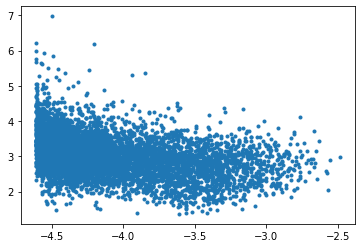

In [36]:
km = list(kmeans.values())
plt.plot(np.asarray(pgr)[np.argsort(pgr)],np.asarray(km)[np.argsort(pgr)],'.')

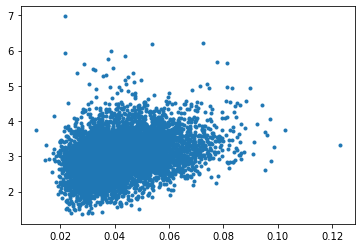

In [38]:
plt.plot(np.asarray(sz)[np.argsort(sz)],np.asarray(km)[np.argsort(sz)],'.')